# A Very Basic Language Detector

Based heavily on Cavnar, William B., and John M. Trenkle. "N-gram-based text categorization", 1994 https://www.let.rug.nl/vannoord/TextCat/textcat.pdf

In [64]:
import importlib
import text_processing_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
importlib.reload(text_processing_utils)

<module 'text_processing_utils' from '/Users/dsrikanth/code/language-classifier/text_processing_utils.py'>

In [33]:
data = pd.read_csv('dataset.csv')

### Zipf's Law
This classifier works on Zipf's law. Zipf's law is an empirically observed law in many natural and human made data collections. (https://en.wikipedia.org/wiki/Zipf%27s_law)

In the context of language, it takes the form "The nth most common word in a human language
text occurs with a frequency inversely proportional to n"

This can be expanded to not only words, but characters, and n-grams of two or more characters.

Let's see if it occurs in the english samples in our dataset

In [39]:
english_data = data[data.language=='English']

In [44]:
english_one_gram_dict = text_processing_utils.create_ngram_dictionary_for_language(english_data, n_values = [1], ngrams_per_dictionary=20)

These are the 20 most commonly occuring 1-grams in the data. 

In [48]:
english_one_gram_dict[0]

[(' ', 68822),
 ('e', 40076),
 ('a', 29361),
 ('t', 28462),
 ('i', 25402),
 ('o', 25011),
 ('n', 24745),
 ('s', 22655),
 ('r', 22166),
 ('h', 15910),
 ('l', 14245),
 ('d', 13337),
 ('c', 12343),
 ('m', 8943),
 ('u', 8915),
 ('f', 7376),
 ('p', 6743),
 ('g', 6655),
 ('w', 5853),
 ('b', 5545)]

Plotting

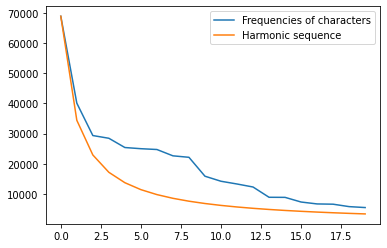

In [60]:
english_char_frequencies = [l[1] for l in english_one_gram_dict[0]]
harmonic_sequence = [english_char_frequencies[0]/i for i in range(1, len(english_char_frequencies)+1)]

plt.plot(english_char_frequencies, label = 'Frequencies of characters')

plt.plot(harmonic_sequence, label = 'Harmonic sequence')
plt.legend(loc="upper right")
plt.show()

The 'Harmonic sequence' plot is the sequence c/x, x in (0,20) where c is the frequency of the most commonly occuring character 

We see that the two sequences are roughly similar, giving some support to Zipf's law

### Using Zipf's law for Language classification

Each 1-gram (character) frequency distribution _should_ be different for each language. As a more extreme example, with two languages with completely different alphabets, say Dutch and Arabic, the distributions should have absolutely no similarity as there are no common characters

In the case of similar languages, say English and Dutch, the distributions should be a bit more similar

We can create a histogram for each language (or a set of histograms for 1-grams, 2-grams etc)

Now, with an unknown text sample, we can compare the distributions of the most commonly occuring n-grams in the sample with precomputed distributions for each language, and choose the most similar language

#### Comparing two distributions

Let d1, d2 be two distributions of languages, s be the distribution of a sample.

One simple way to compare s1 with d1 would be to look at how 'far' each element in s1 is from it's position in d1 (or d2).

For example:
d1 = [(e:10), (a:8), (c:3)], d2 = [(b:10), (c:8), (y:3)],  s1 = [(a:5), (z:2), (c:1)]

distance between d1 and s1: a is 1 position off, z is not present at all in d1, c is in the correct position. We can make an assumption that z is present in c1 at a frequency just less than the lowest frequency in d1, giving it position 4. So z is 2 positions off. The total 'distance' is now 3

distance between d2 and s1: a and z are not in d2 at all, giving distances of 3, 2 respectively. c is at distance 1. So the total 'distance' is 6.

We can say that s1 is 'closer' to 'd1', making it more likely to correspond to the language d1 


In [71]:
d1 = [('e',10), ('a',8), ('c',3)]
d2 = [('b',10), ('c',8), ('y',3)]
s1 = [('a',5), ('z',2), ('c',1)]

print(text_processing_utils.get_distribution_distance(d1, s1))
print(text_processing_utils.get_distribution_distance(d2, s1))

3
6
